# Plot all CG relations 

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
# from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import sys
import os
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
#import pyPIPS.disdrometer_module as dis
import pyPIPS.plotmodule as PIPSplot
# import pyPIPS.simulator as sim
import pyPIPS.pips_io as pipsio
import pyPIPS.PIPS as pips
import pyPIPS.parsivel_params as pp
import pyPIPS.parsivel_qc as pqc
# from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
# from pyCRMtools.pycaps import arps_read
# from pyCRMtools.pycaps import pycaps_fields
# from pyCRMtools.pycaps import calvars_radar as radar
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
# Read in one of the PIPS datasets which has the CG coefficients as attributes
PIPS_dir = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/full_PIPS_dataset_RB15/'
# PIPS_dir = '/Users/dawson29/sshfs_mounts/depot/data/Projects/VORTEXSE/obsdata/full_PIPS_dataset_RB15/'
# PIPS_filename = 'ND_avg_full_dataset_qc_60s.nc'
PIPS_filename = 'parsivel_combined_FMCW_2017_043017_PIPS2A_60s.nc'
PIPS_path = os.path.join(PIPS_dir, PIPS_filename)
PIPS_ds_read = xr.load_dataset(PIPS_path)

# Or read in full dataset for sigma-Dm plot
# PIPS_filenames = glob.glob(PIPS_dir + '/parsivel_combined*60s*nc')
# PIPS_ds_read = xr.open_mfdataset(PIPS_filenames, combine='nested', concat_dim="time", 
#                                  data_vars='minimal', coords='minimal', compat='override', parallel=True)
# Filter on RR > 0.1 mm/h
# PIPS_ds = PIPS_ds_read.where(PIPS_ds_read['rainrate_derived_qc'] > 0.1, drop=True)
PIPS_ds = PIPS_ds_read

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# List of CG fits to plot
moment_combo = '346'

CG_list_lit = ['Z01', 'C08']
CG_label_lit = CG_list_lit.copy()
CG_col_lit = ['black', 'r']
CG_ls_lit = ['-', '-']
CG_lw_lit = [4, 4]
CG_list_qc = ['MM{}_qc'.format(moment_combo), 'TMM{}_qc'.format(moment_combo), 'MM{}_F_qc'.format(moment_combo), 
              'TMM{}_F_qc'.format(moment_combo), 'SATP_MM{}_qc'.format(moment_combo), 
              'SATP_TMM{}_qc'.format(moment_combo)]
CG_label_qc = ['MM{}'.format(moment_combo), 'TMM{}'.format(moment_combo), 'MM{}-F'.format(moment_combo), 
               'TMM{}-F'.format(moment_combo), 'SATP-MM{}'.format(moment_combo), 
               'SATP-TMM{}'.format(moment_combo)]
CG_col_qc = ['indigo', 'indigo', 'darkviolet', 'darkviolet', 'mediumorchid', 'mediumorchid']
CG_ls_qc = ['--', '-', ':', '-', '--', '-']
CG_lw_qc = [1.5, 3, 1.5, 3, 1.5, 3]
CG_list_RB15_qc = ['MM{}_RB15_qc'.format(moment_combo), 'TMM{}_RB15_qc'.format(moment_combo), 
                   'MM{}_F_RB15_qc'.format(moment_combo), 'TMM{}_F_RB15_qc'.format(moment_combo), 
                   'SATP_MM{}_RB15_qc'.format(moment_combo), 'SATP_TMM{}_RB15_qc'.format(moment_combo)]
CG_label_RB15_qc = ['MM{}-RB15'.format(moment_combo), 'TMM{}-RB15'.format(moment_combo), 
                    'MM{}-F-RB15'.format(moment_combo), 'TMM{}-F-RB15'.format(moment_combo), 
                    'SATP-MM{}-RB15'.format(moment_combo), 'SATP-TMM{}-RB15'.format(moment_combo)]
CG_col_RB15_qc = ['darkblue', 'darkblue', 'mediumblue', 'mediumblue', 'blue', 'blue']
CG_ls_RB15_qc = ['--', '-', ':', '-.', '--', '-']
CG_lw_RB15_qc = [1.5, 1.5, 1.5, 1.5, 1.5, 3]

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Grab CG coefficients from file
CG_coeff_lit = [PIPS_ds.attrs['CG_coeff_{}'.format(CG_name)] for CG_name in CG_list_lit]
CG_coeff_qc = [PIPS_ds.attrs['CG_coeff_{}'.format(CG_name)] for CG_name in CG_list_qc]
CG_coeff_RB15_qc = [PIPS_ds.attrs['CG_coeff_{}'.format(CG_name)] for CG_name in CG_list_RB15_qc]

/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/dawson29/miniconda3/envs/pyPIPS/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


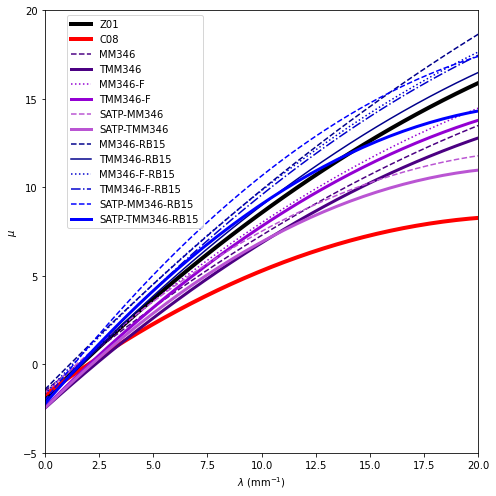

In [14]:
# Plot CG coefficients, one group at a time

plot_dir = '/Volumes/scr_fast/Projects/VORTEXSE/obsdata/full_PIPS_dataset_RB15/plots'

fig, ax = plt.subplots(figsize=(7,7))

# Relations from literature
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_lit, CG_label_lit, CG_coeff_lit, 
                                                             CG_col_lit, CG_ls_lit, CG_lw_lit):
    CG_poly = np.polynomial.polynomial.Polynomial(CG_coeff)
    xx = np.linspace(0.0, 30.0)
    yy = CG_poly(xx)
    ax.plot(xx, yy, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw)
    ax.set_xlim(0.0, 20.0)
    ax.set_ylim(-5.0, 32.0)
    ax.set_xlabel(r'$\lambda$ (mm$^{-1}$)')
    ax.set_ylabel(r'$\mu$')
    # plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=12.)

# Relations from QC'ed dataset (but without RB15 correction)
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_qc, CG_label_qc, CG_coeff_qc, 
                                                             CG_col_qc, CG_ls_qc, CG_lw_qc):
    CG_poly = np.polynomial.polynomial.Polynomial(CG_coeff)
    xx = np.linspace(0.0, 30.0)
    yy = CG_poly(xx)
    ax.plot(xx, yy, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw)
    ax.set_xlim(0.0, 20.0)
    ax.set_ylim(-5.0, 20.0)
    ax.set_xlabel(r'$\lambda$ (mm$^{-1}$)')
    ax.set_ylabel(r'$\mu$')
    
# Relations from QC'ed dataset (with RB15 correction)
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_RB15_qc, CG_label_RB15_qc, CG_coeff_RB15_qc, 
                                                             CG_col_RB15_qc, CG_ls_RB15_qc, CG_lw_RB15_qc):
    CG_poly = np.polynomial.polynomial.Polynomial(CG_coeff)
    xx = np.linspace(0.0, 30.0)
    yy = CG_poly(xx)
    ax.plot(xx, yy, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw)
    ax.set_xlim(0.0, 20.0)
    ax.set_ylim(-5.0, 20.0)
    ax.set_xlabel(r'$\lambda$ (mm$^{-1}$)')
    ax.set_ylabel(r'$\mu$')
    
plt.legend(bbox_to_anchor=(0.04, 1.0), loc='upper left')
plt.tight_layout()

figname = 'all_CG_relations_M{}.eps'.format(moment_combo)
figpath = os.path.join(plot_dir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')


In [ ]:
# Now plot sigma vs. Dm for observations and relations
# Set up range of lambda
lamda_CG = np.linspace(0., 30., num=1000)

# Plot Uncorrected dataset

# Filter dataset for R > 5 and counts > 1000
PIPS_ds_filt = PIPS_ds.where((PIPS_ds['rainrate_derived_qc'] > 5.0) & (PIPS_ds['pcount_derived_qc'] > 1000), 
                             drop=True)
Dm43_obs = PIPS_ds['Dm43_qc'] * 1000.
sigma_obs = PIPS_ds['sigma_qc'] * 1000.
Dm43_obs_filt = PIPS_ds_filt['Dm43_qc'] * 1000.
sigma_obs_filt = PIPS_ds_filt['sigma_qc'] * 1000.

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(Dm43_obs, sigma_obs, color='green', s=10, alpha=0.5)
ax.scatter(Dm43_obs_filt, sigma_obs_filt, color='darkgoldenrod', s=20, alpha=0.75)
# Loop through CG relations and plot associated Dm-sigma points
# First C08 and Z01
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_lit, CG_label_lit, CG_coeff_lit, 
                                                             CG_col_lit, CG_ls_lit, CG_lw_lit):
    mu_CG = dsd.calc_mu_lamda(lamda_CG, CG_coeff)
    Dm43_CG = (4. + mu_CG) / lamda_CG
    sigma_CG = np.sqrt((4. + mu_CG) / lamda_CG**2.)
    ax.plot(Dm43_CG, sigma_CG, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw, alpha=0.75)
# Uncorrected relations
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_qc, CG_label_qc, CG_coeff_qc, 
                                                             CG_col_qc, CG_ls_qc, CG_lw_qc):
    mu_CG = dsd.calc_mu_lamda(lamda_CG, CG_coeff)
    Dm43_CG = (4. + mu_CG) / lamda_CG
    sigma_CG = np.sqrt((4. + mu_CG) / lamda_CG**2.)
    ax.plot(Dm43_CG, sigma_CG, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw, alpha=0.75)
    
ax.set_xlim(0.0, 5.0)
ax.set_ylim(0.0, 2.5)
ax.set_xlabel(r'$D_m$ (mm)')
ax.set_ylabel(r'$\sigma_m$ (mm)')

plt.legend(bbox_to_anchor=(0.04, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(plot_dir + '/all_sigma_Dm_qc.png', dpi=200, bbox_inches='tight')

In [ ]:
# Now plot sigma vs. Dm for observations and relations
# Set up range of lambda
lamda_CG = np.linspace(0., 30., num=1000)

# Plot Uncorrected dataset
PIPS_ds_RB15 = PIPS_ds_read.where(PIPS_ds_read['rainrate_derived_RB15_qc'] > 0.1, drop=True)
# Filter dataset for R > 5 and counts > 1000
PIPS_ds_RB15_filt = PIPS_ds_RB15.where((PIPS_ds_RB15['rainrate_derived_RB15_qc'] > 5.0) & 
                                       (PIPS_ds_RB15['pcount_derived_RB15_qc'] > 1000), drop=True)

Dm43_obs = PIPS_ds_RB15['Dm43_RB15_qc'] * 1000.
sigma_obs = PIPS_ds_RB15['sigma_RB15_qc'] * 1000.

Dm43_obs_filt = PIPS_ds_RB15_filt['Dm43_RB15_qc'] * 1000.
sigma_obs_filt = PIPS_ds_RB15_filt['sigma_RB15_qc'] * 1000.

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(Dm43_obs, sigma_obs, color='green', s=10, alpha=0.5)
ax.scatter(Dm43_obs_filt, sigma_obs_filt, color='darkgoldenrod', s=20, alpha=0.75)
# Loop through CG relations and plot associated Dm-sigma points
# First C08 and Z01
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_lit, CG_label_lit, CG_coeff_lit, 
                                                             CG_col_lit, CG_ls_lit, CG_lw_lit):
    mu_CG = dsd.calc_mu_lamda(lamda_CG, CG_coeff)
    Dm43_CG = (4. + mu_CG) / lamda_CG
    sigma_CG = np.sqrt((4. + mu_CG) / lamda_CG**2.)
    ax.plot(Dm43_CG, sigma_CG, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw, alpha=0.75)
# RB15 relations
for CG_name, CG_label, CG_coeff, CG_col, CG_ls, CG_lw in zip(CG_list_RB15_qc, CG_label_RB15_qc, CG_coeff_RB15_qc, 
                                                             CG_col_RB15_qc, CG_ls_RB15_qc, CG_lw_RB15_qc):
    mu_CG = dsd.calc_mu_lamda(lamda_CG, CG_coeff)
    Dm43_CG = (4. + mu_CG) / lamda_CG
    sigma_CG = np.sqrt((4. + mu_CG) / lamda_CG**2.)
    ax.plot(Dm43_CG, sigma_CG, label=CG_label, c=CG_col, ls=CG_ls, lw=CG_lw, alpha=0.75)
    
ax.set_xlim(0.0, 5.0)
ax.set_ylim(0.0, 2.5)
ax.set_xlabel(r'$D_m$ (mm)')
ax.set_ylabel(r'$\sigma_m$ (mm)')

plt.legend(bbox_to_anchor=(0.04, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig(plot_dir + '/all_sigma_Dm_RB15_qc.png', dpi=200, bbox_inches='tight')

In [ ]:
D0_bins = ND_combined.coords['D0_bins']
RR_bins = ND_combined.coords['RR_bins']
#print(D0_bins[0])
#print(RR_bins[0])
for group, ND_group in list(ND_groups)[:-1]:
    num_DSDs = ND_group.sizes['D0_RR']
    # print(group, num_DSDs)
    if num_DSDs > 10 and group[1] > 0 and group[1] < 82:
        #print(ND_group['diameter'])
        fig, ax = plt.subplots(figsize=(10,10))
        ND_group_avg = ND_group.mean('D0_RR')
        print(D0_bins[group[0]], RR_bins[group[1]])
        for ND in ND_group:
            #print(ND)
            ax.plot(ND_group['diameter'], ND, color='0.7', alpha=0.5)
            ax.plot(ND_group['diameter'], ND_group_avg, 'k')
#             ax.plot(avg_diameter,
#                     Nc_bin_avg[r,
#                                d],
#                     'k',
#                     label='(R,D0) = (%2.2f' % midpoint_R + ',%2.2f' % midpoint_D0 + ')')
            ax.set_yscale('log')
            ax.set_ylim(10.**-1.0, 10.**5.0)
            ax.set_ylabel('Number Concentration, # m^-3 mm^-1')
            ax.set_xlim(0.0, 8.0)
            ax.set_xlabel('Diameter, mm')
            ax.tick_params(direction='in', length=6, top='on', right='on')
#             ax.legend(
#                 bbox_to_anchor=(
#                     1.,
#                     1.),
#                 loc='upper right',
#                 ncol=1,
#                 fancybox=True,
#                 shadow=False)

In [ ]:

hist, xedges, yedges = np.histogram2d(ND_combined['RR'], ND_combined['D0'], bins=(RR_bins, D0_bins))
hist = np.ma.masked_where(hist <= 0.0, hist)
# add 2D color grid of bin sum


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xscale('log')
C = ax.pcolormesh(RR_bins, D0_bins, hist.T, vmin=0.0, vmax=20.0)
ax.set_xlabel(r'$R$ (mm h$^{-1}$)')
ax.set_ylabel(r'$D_0$ (mm)')
ax.set_xlim(0.1, 250.)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(C, orientation='vertical', cax=cax, format = '%d')
image_dir = os.path.join(PIPS_dir, 'plots')
image_name = 'SATP_histogram.eps'
image_path = os.path.join(image_dir, image_name)
plt.savefig(image_path, dpi=200, bbox_inches='tight')

In [ ]:
import natsort
natsort.natsorted(PIPS_filenames)